# [**Tracer la surface de décision des arbres de décision entraînés sur le jeu de données Iris**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_10_tree/plot_iris_dtc.ipynb)<br/>([_Plot the decision surface of decision trees trained on the iris dataset_](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html))

Visualisation la surface de décision d'un arbre de décision entraîné sur des paires de caractéristiques de l'ensemble de données Iris.

Consulter [**Arbre de décision** (1.10)](https://scikit-learn.org/stable/modules/tree.html#tree) pour plus d'informations sur l'estimateur.

Pour chaque paire de caractéristiques de l'iris, l'arbre de décision apprend des frontières de décision constituées de combinaisons de règles de seuillage simples inférées à partir des échantillons d'entraînement.

Nous montrons également la structure de l'arbre de modèle construit avec l'ensemble des caractéristiques.

Commencez par charger une copie de l'ensemble de données Iris fournie avec scikit-learn :

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

Afficher les fonctions de décision des arbres entraînés sur l'ensemble des paires de caractéristiques.

C:\Users\franc\AppData\Local\Temp\ipykernel_3716\3059493431.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\franc\AppData\Local\Temp\ipykernel_3716\3059493431.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\franc\AppData\Local\Temp\ipykernel_3716\3059493431.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\franc\AppData\Local\Temp\ipykernel_3716\3059493431.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\franc\AppData\Local\Temp\ipykernel_3716\3059493431.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\franc\AppData\Local\Temp\ipykernel_3716\3059493431.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap'

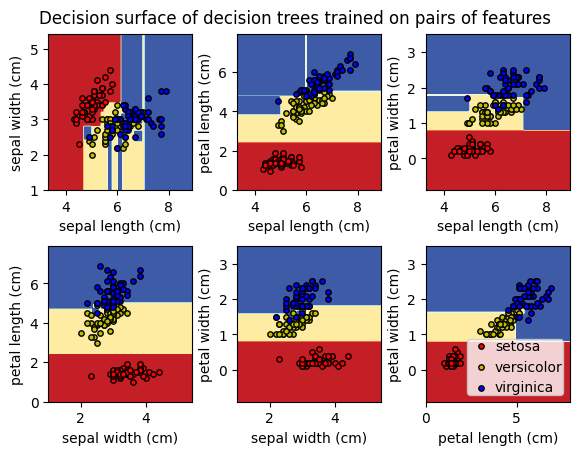

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Afficher la structure d'un seul arbre de décision entraîné avec l'ensemble des caractéristiques.

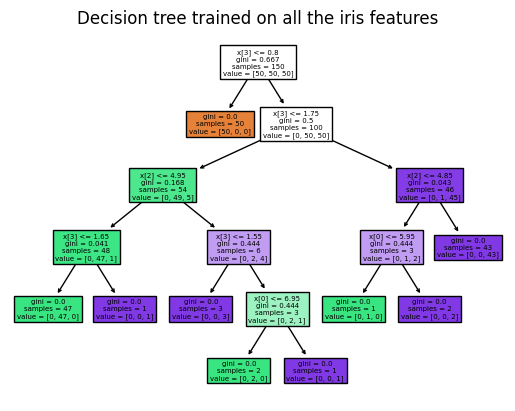

In [3]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()